# GFPGAN Inference

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>



# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 527 (delta 211), reused 195 (delta 194), pack-reused 273
Receiving objects: 100% (527/527), 5.38 MiB | 33.77 MiB/s, done.
Resolving deltas: 100% (282/282), done.
/content/GFPGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 24.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Usi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Upload Images / Use the demo images

### A. Google Drive Mount

In [ ]:
from google.colab import drive
import os
import shutil
from tqdm import tqdm

# Google 드라이브 내 원하는 폴더로 디렉토리 설정
source_folder = '/content/drive/MyDrive/deimg/test_image2'
upload_folder = 'inputs/upload' # Colab 로컬 환경에 저장할 폴더명

# 해당 폴더가 없다면 생성
if not os.path.exists(upload_folder):
    os.makedirs(upload_folder)

# tqdm을 사용하여 source_folder 내의 파일들을 열거하고 각 파일을 upload_folder로 복사
for filename in tqdm(os.listdir(source_folder), desc='Copying files'):
    src_path = os.path.join(source_folder, filename)
    dst_path = os.path.join(upload_folder, filename)
    shutil.copy(src_path, dst_path)
    print(f'Copied {filename} to {dst_path}')


Copying files:  14%|█▍        | 1/7 [00:00<00:03,  1.59it/s]

Copied masked_processed_20221101_ID0381_A_03_N00107.png to inputs/upload/masked_processed_20221101_ID0381_A_03_N00107.png


Copying files:  29%|██▊       | 2/7 [00:01<00:03,  1.35it/s]

Copied masked_processed_20221101_ID0377_A_01_N00067.png to inputs/upload/masked_processed_20221101_ID0377_A_01_N00067.png


Copying files:  43%|████▎     | 3/7 [00:01<00:02,  1.59it/s]

Copied masked_processed_20221101_ID0379_A_01_N00108.png to inputs/upload/masked_processed_20221101_ID0379_A_01_N00108.png


Copying files:  57%|█████▋    | 4/7 [00:02<00:02,  1.31it/s]

Copied masked_processed_20221031_ID1212_A_04_N00174.png to inputs/upload/masked_processed_20221031_ID1212_A_04_N00174.png


Copying files:  71%|███████▏  | 5/7 [00:03<00:01,  1.37it/s]

Copied masked_processed_20221031_ID1215_A_04_N00169.png to inputs/upload/masked_processed_20221031_ID1215_A_04_N00169.png


Copying files:  86%|████████▌ | 6/7 [00:04<00:00,  1.32it/s]

Copied masked_processed_20221101_ID0376_A_03_N00169.png to inputs/upload/masked_processed_20221101_ID0376_A_03_N00169.png


Copying files: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

Copied masked_processed_20221101_ID0379_A_04_N00095.png to inputs/upload/masked_processed_20221101_ID0379_A_04_N00095.png


### B. Local Upload

In [ ]:
import os
from google.colab import files
import shutil
from tqdm import tqdm

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()

# 진행 상황을 tqdm으로 표시
for filename in tqdm(uploaded.keys(), desc='Moving uploaded files'):
    dst_path = os.path.join(upload_folder, filename)
    shutil.move(filename, dst_path)
    print(f'Moved {filename} to {dst_path}')


Saving masked_processed_20221031_ID0371_A_03_N00064.png to masked_processed_20221031_ID0371_A_03_N00064.png


Moving uploaded files: 100%|██████████| 1/1 [00:00<00:00, 828.75it/s]

Moved masked_processed_20221031_ID0371_A_03_N00064.png to inputs/upload/masked_processed_20221031_ID0371_A_03_N00064.png


### C. OR you can use the demo image by running the following codes

In [ ]:
import shutil
import os
upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.makedirs(upload_folder, exist_ok=True)
shutil.move('inputs/whole_imgs/Blake_Lively.jpg', 'inputs/upload/Blake_Lively.jpg')

'inputs/upload/Blake_Lively.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. setting

In [ ]:
! cd /usr/local/lib/python3.10/dist-packages/basicsr/data
! ls


assets		    Comparisons.md  gfpgan.egg-info	 MANIFEST.in	README.md	  setup.py
CODE_OF_CONDUCT.md  experiments     inference_gfpgan.py  options	requirements.txt  tests
cog_predict.py	    FAQ.md	    inputs		 PaperModel.md	scripts		  VERSION
cog.yaml	    gfpgan	    LICENSE		 README_CN.md	setup.cfg


In [ ]:
with open('/usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py', 'r') as file:
    content = file.read()
print(content)



import cv2
import math
import numpy as np
import random
import torch
from scipy import special
from scipy.stats import multivariate_normal
from torchvision.transforms.functional import rgb_to_grayscale

# -------------------------------------------------------------------- #
# --------------------------- blur kernels --------------------------- #
# -------------------------------------------------------------------- #


# --------------------------- util functions --------------------------- #
def sigma_matrix2(sig_x, sig_y, theta):
    """Calculate the rotated sigma matrix (two dimensional matrix).

    Args:
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.

    Returns:
        ndarray: Rotated sigma matrix.
    """
    d_matrix = np.array([[sig_x**2, 0], [0, sig_y**2]])
    u_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(u_matrix, np.dot(d_matrix, u_matrix.T))


def mesh_grid(kernel_size

In [ ]:
import os

# Path to the file
file_path = '/usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py'

# Read the content of the file
try:
    with open(file_path, 'r') as file:
        content = file.readlines()

    # Display the current content (optional)
    print("Current content of the file:")
    for line in content:
        print(line, end='')

    # Example of an automatic edit:
    # Change the import statement from torchvision.transforms.functional_tensor to torchvision.transforms.functional
    modified_content = []
    target_line = "from torchvision.transforms.functional_tensor import rgb_to_grayscale\n"
    new_line = "from torchvision.transforms.functional import rgb_to_grayscale\n"

    for line in content:
        if line == target_line:
            modified_content.append(new_line)
            print("Modified line from:\n", target_line, "to:\n", new_line)
        else:
            modified_content.append(line)

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.writelines(modified_content)
    print("File has been updated successfully!")

except Exception as e:
    print("An error occurred while modifying the file:", str(e))


Current content of the file:
import cv2
import math
import numpy as np
import random
import torch
from scipy import special
from scipy.stats import multivariate_normal
from torchvision.transforms.functional import rgb_to_grayscale

# -------------------------------------------------------------------- #
# --------------------------- blur kernels --------------------------- #
# -------------------------------------------------------------------- #


# --------------------------- util functions --------------------------- #
def sigma_matrix2(sig_x, sig_y, theta):
    """Calculate the rotated sigma matrix (two dimensional matrix).

    Args:
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.

    Returns:
        ndarray: Rotated sigma matrix.
    """
    d_matrix = np.array([[sig_x**2, 0], [0, sig_y**2]])
    u_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(u_matrix, np.dot(d_matrix, u_matrix.T)

# 4. Inference

`-i` : (drive path for the input masked low resolution image set)

`-o` : (drive path to save the masked high-resolution restored image set)


---

transfer of high-resolution images from `-i` to `-o` on Google Drive.

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
# !python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 --bg_upsampler realesrgan -only_center_face

!python inference_gfpgan.py -i /content/drive/MyDrive/deimg/B/B002_1/002_1_b -o /content/drive/MyDrive/deimg/B/B002_1/result_b -v 1.3 -s 2

# ! python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 2 -bg_upsampler realesrgan
# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
#
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

# !ls results/cmp

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Processing masked_processed_20221101_ID0382_B_03_N00090.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0382_B_03_N00093.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0382_B_03_N00130.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0382_B_03_N00132.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0382_B_04_N00236.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_01_N00042.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_01_N00094.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_01_N00097.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_01_N00109.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_01_N00123.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_02_N00058.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_02_N00067.png ...
	Tile 1/1
Processing masked_processed_20221101_ID0383_B_02_N00072.png ...
	Tile 1/1
Pr

Chek # of images in folder path

In [ ]:
import os


image_folder = '/content/drive/MyDrive/deimg/result/testresult_A'
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tif', '.tiff']
files = os.listdir(image_folder)

image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions)

print(f'폴더 내 이미지 파일 수: {image_count}')


# 5. Visualize

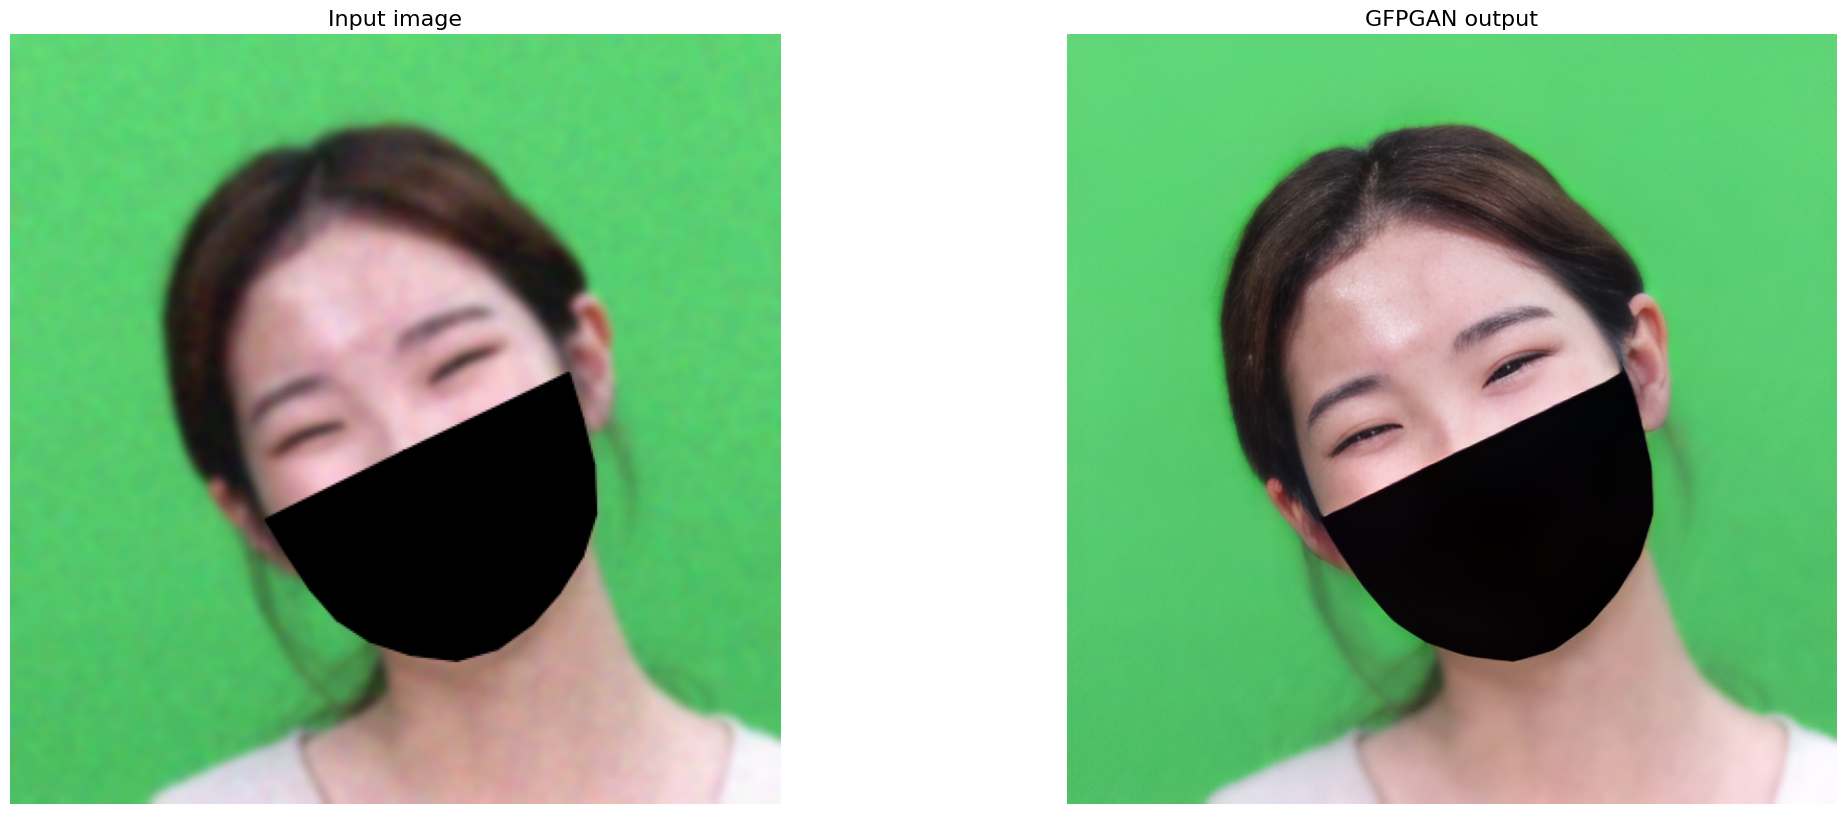

In [ ]:
# We then visualize the whole image
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 6. Download results

In [ ]:
import os

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces  restored_imgs
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# BibTeX

@InProceedings{wang2021gfpgan,
    author = {Xintao Wang and Yu Li and Honglun Zhang and Ying Shan},
    title = {Towards Real-World Blind Face Restoration with Generative Facial Prior},
    booktitle={The IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
    year = {2021}
}